### CDC Data Analysis on yearly Alcohol and Drug Related Deaths by Urbanization

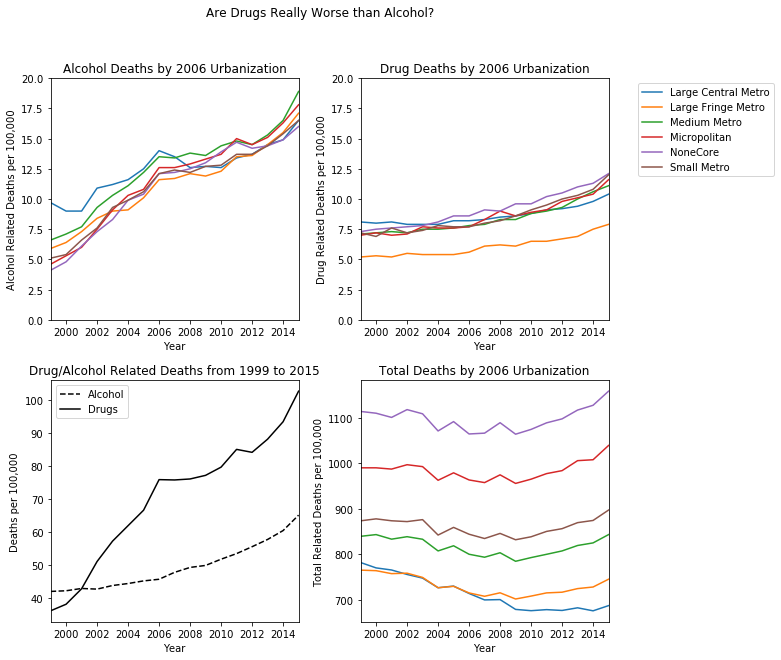

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("CDC_data.txt", delimiter='\t')
#Drop weird rows
df_urban = df[pd.isnull(df.Notes)]
del df_urban["Notes"]
del df_urban["Year Code"]

fig, ax = plt.subplots(2,2, figsize=(10,10))

df_urban[df_urban['Drug/Alcohol Induced Causes Code'] == 'D'].groupby("2006 Urbanization").plot(x="Year", y="Crude Rate", ax = ax[0,0])
ax[0,0].legend().remove()
ax[0,0].set_ylabel('Alcohol Related Deaths per 100,000')
ax[0,0].set_title('Alcohol Deaths by 2006 Urbanization')
ax[0,0].set_ylim(0,20)

df_urban[df_urban['Drug/Alcohol Induced Causes Code'] == 'A'].groupby("2006 Urbanization").plot(x="Year", y="Crude Rate", ax = ax[0,1])
ax[0,1].legend(["Large Central Metro", "Large Fringe Metro", "Medium Metro", 
                "Micropolitan", "NoneCore", 
                "Small Metro"], bbox_to_anchor=(1.1, 1), loc=2)
ax[0,1].set_ylabel('Drug Related Deaths per 100,000')
ax[0,1].set_title('Drug Deaths by 2006 Urbanization')
ax[0,1].set_ylim(0,20)

df_urban[df_urban['Drug/Alcohol Induced Causes Code'] == 'O'].groupby("2006 Urbanization").plot(x="Year", y="Crude Rate", ax = ax[1,1])
ax[1,1].legend().remove()
ax[1,1].set_ylabel('Total Related Deaths per 100,000')
ax[1,1].set_title('Total Deaths by 2006 Urbanization')

df_urban[df_urban['Drug/Alcohol Induced Causes Code'] == 'A'].groupby('Year').sum().reset_index().plot(x="Year", y="Crude Rate", ax = ax[1,0], label="Alcohol", c='k', ls='--')
df_urban[df_urban['Drug/Alcohol Induced Causes Code'] == 'D'].groupby('Year').sum().reset_index().plot(x="Year", y="Crude Rate", ax = ax[1,0], label="Drugs", c='k', ls='-')
ax[1,0].set_title('Drug/Alcohol Related Deaths from 1999 to 2015')
ax[1,0].set_ylabel('Deaths per 100,000')

fig.suptitle('Are Drugs Really Worse than Alcohol?')
fig.subplots_adjust( wspace=0.25, hspace=0.25)
plt.show()

Data are sourced from the CDC Wonder Database.  The lines themselves seem understandable but the rate of increase in deaths is alarming.  One interesting nuance is that total drug related deaths beat out alcohol related deaths before 2000; however, alcohol deaths are on an alarming rise.  Such a sharp uptick in deaths is alarming when alcoholism gets so little media coverage while drug useage is a current hot topic.  One interesting outlier in the urbanization data is the Large Fringe Metro.  This relates to living in a large city but not being in a central location in that city.  Like living in NYC but not living in Manhattan.  This could be in part due to the large working populations with few to no children.

In [1]:
!jupyter nbconvert --to html CDC_Drugs_vs_Alcohol.ipynb

[NbConvertApp] Converting notebook CDC_Drugs_vs_Alcohol.ipynb to html
[NbConvertApp] Writing 390028 bytes to CDC_Drugs_vs_Alcohol.html
